### Linear Regression with possible modes of 'NE' (normal equation, exact solution), 'GD' (gradient descent) ,
### 'GDM' (GD with momentum), 'SGD' (stochastic GD), 'SGDM' (stochastic GD with momentum)

In [1]:
import numpy as np

In [2]:
class LinearRegression():
        
        #********************************************************************
        # INITIALIZING  
        #********************************************************************
        def __init__(self, mode = "NE", learn_rate = 0.01, nb_epochs = 1000, batch_size = 32, beta = 0.9, tolerance = 1e-4):
            if mode not in ["NE", "GD", "GDM", "SGD", "SGDM"]:
                raise ValueError(mode + " is not a valid choice.")
            self.mode = mode
            # parameters
            self.Theta = None
            # learning rate  
            self.learn_rate = learn_rate
            # number of max iterations 
            self.nb_epochs = nb_epochs
            # optimizing with momentum 
            self.beta = beta
            self.mo = None
            # the minimum value of norm(grad) for momentum optimization
            self.tolerance = tolerance
            # size of batch in SGD
            self.batch_size = batch_size
        
        
        #********************************************************************
        # FIT 
        #********************************************************************
        
        def fit(self, X, Y):
            X_1 = np.c_[np.ones(X.shape[0]), X]
            
            #----------------------------------------------------------------
            # The exact solution
            #----------------------------------------------------------------
            
            if self.mode == "NE":
                self.Theta = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T.dot(Y))
                return True
            
            
            #----------------------------------------------------------------
            # Gradient Descent
            #----------------------------------------------------------------
            
            elif self.mode == "GD":
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
                for i in range(self.nb_epochs):
                    # check that gradient is not too small value
                    if np.linalg.norm(grad) > self.tolerance:
                        self.Theta -= self.learn_rate*grad
                        grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
                return True
            
            
            #----------------------------------------------------------------
            # Gradient Descent with Momentum
            #----------------------------------------------------------------
            
            elif self.mode == "GDM":
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                    self.mo = np.zeros_like(self.Theta)
                grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
                for i in range(self.nb_epochs):
                    # check that gradient is not too small value
                    if np.linalg.norm(grad) > self.tolerance:
                        # momentum optimization
                        self.mo = self.beta*self.mo + grad
                        self.Theta -= self.learn_rate*self.mo
                        grad = X_1.T.dot(X_1.dot(self.Theta) - Y)/X_1.shape[0]
                return True
            
            
            #----------------------------------------------------------------
            # Stochastic Gradient Descent
            #----------------------------------------------------------------
            
            elif self.mode == "SGD":                
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                    
                # Calculating number of batches
                nb_X = X_1.shape[0]
                nb_batch = int(nb_X / self.batch_size)
            
                # If size of last batch is less that batch_size
                # then consider it as another batch anyway
                if nb_X % nb_batch != 0:
                    nb_batch += 1
                 
                for i in range(self.nb_epochs):
                    # returns permuted range 
                    permuted_nb_batch = np.random.permutation(nb_batch)
                
                    for batch in range(nb_batch):
                        # we run through the list of permuted batches
                        # len(permuted_nb_batch) = nb_batch
                        j = permuted_nb_batch[batch]                    
                        x_batch = X_1[j*self.batch_size:(j+1)*self.batch_size,:]
                        y_batch = Y[j*self.batch_size:(j+1)*self.batch_size,:]
                                        
                        grad = (x_batch.T.dot(x_batch.dot(self.Theta) - y_batch)) / x_batch.shape[0]                        
                        self.Theta -= self.learn_rate*grad
                return True
            
            
            #----------------------------------------------------------------
            # Stochastic Gradient Descent with momentum
            #----------------------------------------------------------------
            
            elif self.mode == "SGDM":                
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                    self.mo = np.zeros_like(self.Theta)
                    
                # Calculating number of batches
                nb_X = X_1.shape[0]
                nb_batch = int(nb_X / self.batch_size)
            
                # If size of last batch is less that batch_size
                # then consider it as another batch anyway
                if nb_X % nb_batch != 0:
                    nb_batch += 1
                 
                for i in range(self.nb_epochs):
                    # returns permuted range 
                    permuted_nb_batch = np.random.permutation(nb_batch)
                
                    for batch in range(nb_batch):
                        # we run through the list of permuted batches
                        # len(permuted_nb_batch) = nb_batch
                        j = permuted_nb_batch[batch]                    
                        x_batch = X_1[j*self.batch_size:(j+1)*self.batch_size,:]
                        y_batch = Y[j*self.batch_size:(j+1)*self.batch_size,:]
                                        
                        grad = (x_batch.T.dot(x_batch.dot(self.Theta) - y_batch)) / x_batch.shape[0]
                        # momentum optimization
                        self.mo = self.beta*self.mo + grad
                        self.Theta -= self.learn_rate*self.mo
                return True
               
        
        #********************************************************************
        # PREDICT 
        #********************************************************************                
            
        def predict(self, X):
            if self.Theta is None:
                return False
            else:
                X_1 = np.c_[np.ones(X.shape[0]), X]
                return X_1.dot(self.Theta)

### Examples

### Simple data set

In [3]:
import matplotlib.pyplot as plt

In [4]:
x_ = np.array(10 * np.random.rand(50))
y_ = 2 * x_ - 5 + np.random.randn(50)
x = x_.reshape(50, 1)
y = y_.reshape(50, 1)
print(x.shape, y.shape)

(50, 1) (50, 1)


In [5]:
simple_modelNE = LinearRegression(mode="NE")
simple_modelNE.fit(x, y)
y_predNE = simple_modelNE.predict(x)
simple_modelNE.Theta

array([[-5.18927208],
       [ 2.01156254]])

In [6]:
simple_modelGD = LinearRegression(mode="GD", nb_epochs=1000)
simple_modelGD.fit(x, y)
y_predGD = simple_modelGD.predict(x)
simple_modelGD.Theta

array([[-4.65861882],
       [ 1.93025611]])

In [7]:
simple_modelGDM = LinearRegression(mode="GDM", nb_epochs=100)
simple_modelGDM.fit(x, y)
y_predGDM = simple_modelGDM.predict(x)
simple_modelGDM.Theta

array([[-4.86149006],
       [ 1.96558943]])

In [8]:
simple_modelSGD = LinearRegression(mode="SGD", nb_epochs=2000)
simple_modelSGD.fit(x, y)
y_predSGD = simple_modelSGD.predict(x)
simple_modelSGD.Theta

array([[-5.55387886],
       [ 2.08048258]])

In [9]:
simple_modelSGDM = LinearRegression(mode="SGDM", nb_epochs=150)
simple_modelSGDM.fit(x, y)
y_predSGDM = simple_modelSGDM.predict(x)
simple_modelSGDM.Theta

array([[-5.47840457],
       [ 2.06912018]])

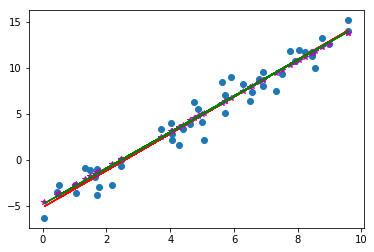

In [10]:
plt.scatter(x, y)
plt.plot(x, y_predNE, "r-")
plt.plot(x, y_predGD, "m*")
plt.plot(x, y_predGDM, "g-")

### Data set with more features

In [11]:
X = np.random.rand(500, 10)
X_1 = np.c_[np.ones(X.shape[0]), X]
Theta_1 = np.array([[-5,10,2,7,4.5,0.1,0.01,-1,1,3,0]])
Err = np.random.normal(0, 0.1, size=(X_1.shape[0], 1)) 
Y = X_1.dot(Theta_1.T) + Err

In [12]:
modelNE = LinearRegression(mode="NE")
%time modelNE.fit(X, Y)
for i in range(modelNE.Theta.shape[0]):
    print(modelNE.Theta[i], '-->', Theta_1.T[i])

Wall time: 0 ns
[-4.98421433] --> [-5.]
[ 9.9621895] --> [ 10.]
[ 1.98774587] --> [ 2.]
[ 7.02257578] --> [ 7.]
[ 4.50192529] --> [ 4.5]
[ 0.11281694] --> [ 0.1]
[-0.0073054] --> [ 0.01]
[-0.97825976] --> [-1.]
[ 0.99968852] --> [ 1.]
[ 3.01188402] --> [ 3.]
[-0.02206315] --> [ 0.]


In [13]:
modelGD = LinearRegression(mode="GD", nb_epochs=20000)
%time modelGD.fit(X, Y)
for i in range(modelGD.Theta.shape[0]):
    print(modelGD.Theta[i], '-->', Theta_1.T[i])

Wall time: 750 ms
[-4.87147233] --> [-5.]
[ 9.93245847] --> [ 10.]
[ 1.97174981] --> [ 2.]
[ 6.99754145] --> [ 7.]
[ 4.48102202] --> [ 4.5]
[ 0.09138009] --> [ 0.1]
[-0.02538744] --> [ 0.01]
[-1.00280426] --> [-1.]
[ 0.98307488] --> [ 1.]
[ 2.99719962] --> [ 3.]
[-0.05430666] --> [ 0.]


In [14]:
modelGDM = LinearRegression(mode="GDM", nb_epochs=2000)
%time modelGDM.fit(X, Y)
for i in range(modelGDM.Theta.shape[0]):
    print(modelGDM.Theta[i], '-->', Theta_1.T[i])

Wall time: 90 ms
[-4.87879883] --> [-5.]
[ 9.93439086] --> [ 10.]
[ 1.9727893] --> [ 2.]
[ 6.99916892] --> [ 7.]
[ 4.48238078] --> [ 4.5]
[ 0.09277362] --> [ 0.1]
[-0.02421358] --> [ 0.01]
[-1.00120914] --> [-1.]
[ 0.98415408] --> [ 1.]
[ 2.99815351] --> [ 3.]
[-0.05221121] --> [ 0.]


In [15]:
modelSGD = LinearRegression(mode="SGD", nb_epochs=1500)
%time modelSGD.fit(X, Y)
for i in range(modelSGD.Theta.shape[0]):
    print(modelSGD.Theta[i], '-->', Theta_1.T[i])

Wall time: 600 ms
[-4.9434931] --> [-5.]
[ 9.95222655] --> [ 10.]
[ 1.982912] --> [ 2.]
[ 7.01078195] --> [ 7.]
[ 4.49368032] --> [ 4.5]
[ 0.10528523] --> [ 0.1]
[-0.01244892] --> [ 0.01]
[-0.9864597] --> [-1.]
[ 0.99376198] --> [ 1.]
[ 3.00553634] --> [ 3.]
[-0.03322405] --> [ 0.]


In [16]:
modelSGDM = LinearRegression(mode="SGDM", nb_epochs=150)
%time modelSGDM.fit(X, Y)
for i in range(modelSGDM.Theta.shape[0]):
    print(modelSGDM.Theta[i], '-->', Theta_1.T[i])

Wall time: 80 ms
[-4.94856412] --> [-5.]
[ 9.9516315] --> [ 10.]
[ 1.9831856] --> [ 2.]
[ 7.01180804] --> [ 7.]
[ 4.49494055] --> [ 4.5]
[ 0.10621486] --> [ 0.1]
[-0.01165184] --> [ 0.01]
[-0.98583417] --> [-1.]
[ 0.99554587] --> [ 1.]
[ 3.00633728] --> [ 3.]
[-0.03113171] --> [ 0.]


In [29]:
from sklearn import linear_model

sklearn_linreg = linear_model.LinearRegression()
%time sklearn_linreg.fit(X, Y)
sklearn_linreg.predict(X)
sklearn_linreg.score(X, Y)

Wall time: 20 ms


0.99941387938769843